In [1]:
#Data collection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train.csv")

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
del df["Name"]

In [5]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
del df['Cabin']

In [8]:
df["Age"]=df["Age"].replace(np.nan, df["Age"].median())

In [9]:
df["Embarked"]=df["Embarked"].replace(np.nan, df["Embarked"].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate through the columns you want to label encode
columns_to_label_encode = ["Sex", "Ticket", "Embarked"]

for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,2
887,888,1,1,0,19.0,0,0,14,30.0000,2
888,889,0,3,0,28.0,1,2,675,23.4500,2
889,890,1,1,1,26.0,0,0,8,30.0000,0


In [13]:
X = df.iloc[:, 2:] 
print(X.head(), X.shape)
y = df.iloc[:, 1] 
y.head()

   Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Embarked
0       3    1  22.0      1      0     523   7.2500         2
1       1    0  38.0      1      0     596  71.2833         0
2       3    0  26.0      0      0     669   7.9250         2
3       1    0  35.0      1      0      49  53.1000         2
4       3    1  35.0      0      0     472   8.0500         2 (891, 8)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y, test_size = 0.2, random_state=100)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
#Testing accuracy
accuracy_score(y_test,y_pred)

0.8324022346368715

In [20]:
#Training accuracy
y_pred_tr = model.predict(X_train)

In [21]:
accuracy_score(y_train,y_pred_tr)

0.9985955056179775

C:\Users\Shu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


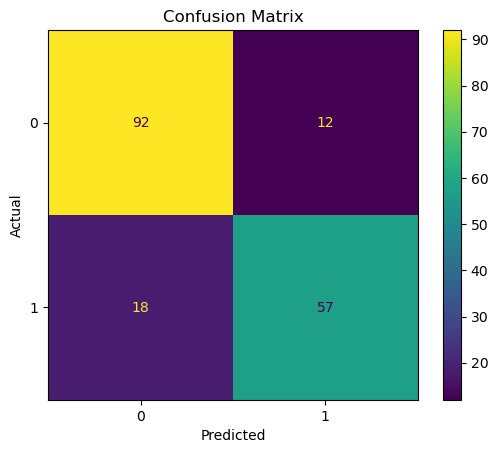

In [22]:
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(model, X_test, y_test)
cm.ax_.set_title("Confusion Matrix")
cm.ax_.set_xlabel("Predicted")
cm.ax_.set_ylabel("Actual")
plt.grid(False) 
plt.show()

In [23]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.83      0.76      0.79        75

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



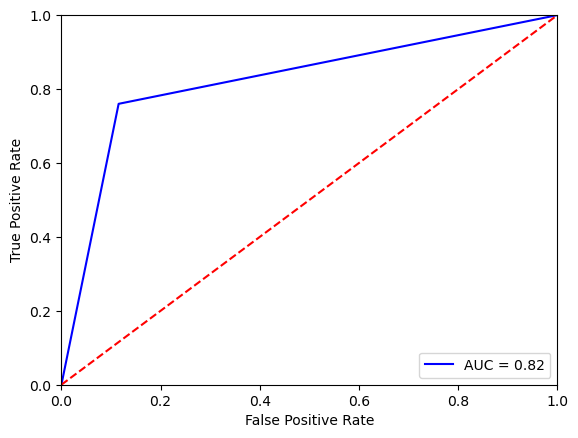

In [24]:
import sklearn.metrics as metrics
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

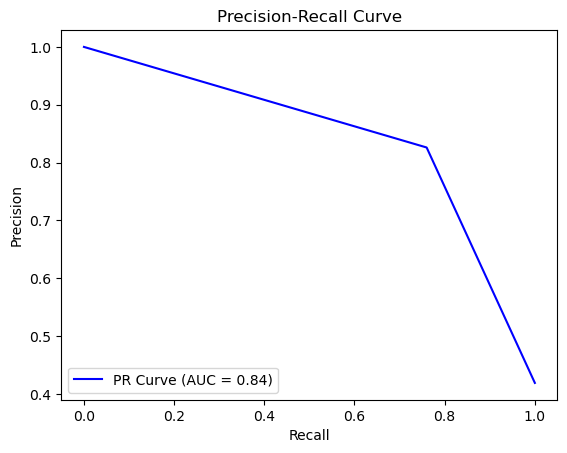

In [25]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='b', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [26]:
df_test=pd.read_csv("tit_test.csv")

In [27]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
del df_test["Name"]

In [29]:
del df_test["Cabin"]

In [30]:
df_test["Age"]=df_test["Age"].replace(np.nan, df_test["Age"].median())

In [31]:
df_test["Fare"]=df_test["Fare"].replace(np.nan, df_test["Fare"].median())

In [32]:
df_test["Embarked"]=df_test["Embarked"].replace(np.nan, df_test["Embarked"].mode()[0])

In [33]:
columns_to_label_encode_test = ["Sex", "Ticket", "Embarked"]

for col in columns_to_label_encode_test:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [34]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,152,7.8292,1
1,893,3,0,47.0,1,0,221,7.0000,2
2,894,2,1,62.0,0,0,73,9.6875,1
3,895,3,1,27.0,0,0,147,8.6625,2
4,896,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,267,8.0500,2
414,1306,1,0,39.0,0,0,324,108.9000,0
415,1307,3,1,38.5,0,0,346,7.2500,2
416,1308,3,1,27.0,0,0,220,8.0500,2


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    int32  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


In [36]:
df_test_pred = df_test.drop("PassengerId", axis=1)

In [37]:
df_test_pred

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,267,8.0500,2
414,1,0,39.0,0,0,324,108.9000,0
415,3,1,38.5,0,0,346,7.2500,2
416,3,1,27.0,0,0,220,8.0500,2


In [38]:
y_pred_test = model.predict(df_test_pred)

In [39]:
passenger_ids = df_test['PassengerId']

# Create a DataFrame combining 'PassengerId' and 'y_pred_test'
final_test_df = pd.DataFrame({'PassengerId': passenger_ids, 'Predictions': y_pred_test})

In [40]:
final_test_df

,PassengerId,Predictions
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
final_test_df.to_csv('final_test_predictions.csv', index=False)